# Binance data 
This program retreives data from the Binance database.
Documentation to be found at:

https://medium.com/swlh/retrieving-full-historical-data-for-every-cryptocurrency-on-binance-bitmex-using-the-python-apis-27b47fd8137f

In [3]:
import pandas as pd
import math
import os.path
import time
from binance.client import Client
from datetime import timedelta, datetime
from dateutil import parser
from tqdm import tqdm_notebook

In [4]:
binance_api_key = 'Gtt4c9aDGPQc12o4P9HuvT2dQzWroxHcBRXLkuGYmCBzNS96wKnscx3ZcyHPyzcD'
binance_api_secret = 'wOo5BUrKRDSmCrNJHjcJz1GePZIEkmdqd8NG9CrAAakl0jrhYAXR8DeJwRYgCzOt'

In [5]:
binsizes = {"1m": 1, "5m": 5, "1h": 60, "1d": 1440}
batch_size = 750
binance_client = Client(api_key=binance_api_key, api_secret=binance_api_secret)

In [6]:
def minutes_of_new_data(symbol, kline_size, data, source):
    if len(data) > 0:  old = parser.parse(data["timestamp"].iloc[-1])
    elif source == "binance": old = datetime.strptime('1 Jan 2017', '%d %b %Y')
    #elif source == "bitmex": old = bitmex_client.Trade.Trade_getBucketed(symbol=symbol, binSize=kline_size, count=1, reverse=False).result()[0][0]['timestamp']
    if source == "binance": new = pd.to_datetime(binance_client.get_klines(symbol=symbol, interval=kline_size)[-1][0], unit='ms')
    #if source == "bitmex": new = bitmex_client.Trade.Trade_getBucketed(symbol=symbol, binSize=kline_size, count=1, reverse=True).result()[0][0]['timestamp']
    return old, new

In [7]:
def get_all_binance(symbol, kline_size, save = False):
    filename = '%s-%s-data.csv' % (symbol, kline_size)
    if os.path.isfile(filename): data_df = pd.read_csv(filename)
    else: data_df = pd.DataFrame()
    oldest_point, newest_point = minutes_of_new_data(symbol, kline_size, data_df, source = "binance")
    delta_min = (newest_point - oldest_point).total_seconds()/60
    available_data = math.ceil(delta_min/binsizes[kline_size])
    if oldest_point == datetime.strptime('1 Jan 2017', '%d %b %Y'): print('Downloading all available %s data for %s. Be patient..!' % (kline_size, symbol))
    else: print('Downloading %d minutes of new data available for %s, i.e. %d instances of %s data.' % (delta_min, symbol, available_data, kline_size))
    klines = binance_client.get_historical_klines(symbol, kline_size, oldest_point.strftime("%d %b %Y %H:%M:%S"), newest_point.strftime("%d %b %Y %H:%M:%S"))
    data = pd.DataFrame(klines, columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore' ])
    data['timestamp'] = pd.to_datetime(data['timestamp'], unit='ms')
    if len(data_df) > 0:
        temp_df = pd.DataFrame(data)
        data_df = data_df.append(temp_df)
    else: data_df = data
    data_df.set_index('timestamp', inplace=True)
    if save: data_df.to_csv(filename)
    print('All caught up..!')
    return data_df

In [23]:
tickers = ['BTCUSDT',
 'ETHUSDT',
 'LTCUSDT',
 'ADAUSDT',
 'XRPUSDT',
 'EOSUSDT',
 'IOTAUSDT',
 'XLMUSDT',
 'TRXUSDT',
 'LINKUSDT',
 'XMRUSDT',
 'DASHUSDT']

In [34]:
for symbol in tickers:
    get_all_binance(symbol, '1d', save = True)

All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!
All caught up..!


In [48]:
data = {}
for i in range(len(tickers)):
    data.update({tickers[i]: pd.read_csv(tickers[i]+'-1d-data.csv')})

In [61]:
data['BTCUSDT']

,timestamp,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
0,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,1503014399999,3.454770e+06,3427,616.248541,2.678216e+06,8733.911395
1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,1503100799999,5.086958e+06,5233,972.868710,4.129123e+06,9384.141409
2,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,1503187199999,1.549484e+06,2153,274.336042,1.118002e+06,9184.085529
3,2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022,1503273599999,1.930364e+06,2321,376.795947,1.557401e+06,10125.414084
4,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,1503359999999,2.797232e+06,3972,557.356107,2.255663e+06,11706.769970
5,2017-08-22,4016.00,4104.82,3400.00,4040.00,966.684858,1503446399999,3.752506e+06,6494,423.995181,1.637188e+06,11773.279500
6,2017-08-23,4040.00,4265.80,4013.89,4114.01,1001.136565,1503532799999,4.148686e+06,8629,309.419092,1.293567e+06,12724.375335
7,2017-08-24,4147.00,4371.68,4085.01,4316.01,787.418753,1503619199999,3.296476e+06,6247,206.820412,8.683791e+05,14231.326305
8,2017-08-25,4316.01,4453.91,4247.48,4280.68,573.612740,1503705599999,2.484637e+06,6554,100.097974,4.345771e+05,12945.436308
9,2017-08-26,4280.71,4367.00,4212.41,4337.44,228.108068,1503791999999,9.778657e+05,2260,56.190141,2.413638e+05,11789.067502


In [99]:
for symbol in tickers:
    print(min(data[symbol]['timestamp']))

for symbol in tickers:
    print(data[symbol].shape)

2017-08-17
2017-08-17
2017-12-13
2018-04-17
2018-05-04
2018-05-28
2018-05-31
2018-05-31
2018-06-11
2019-01-16
2019-03-15
2019-03-28
(807, 12)
(802, 12)
(683, 12)
(558, 12)
(541, 12)
(517, 12)
(514, 12)
(514, 12)
(503, 12)
(284, 12)
(226, 12)
(213, 12)


In [82]:
data_open = {}
for i in range(len(tickers)):
    data_open.update({tickers[i]:data[tickers[i]][['timestamp', 'open']]})
    data_open[tickers[i]].rename(columns = {'open':tickers[i]}, inplace=True)


In [88]:
data_open[tickers[5]].columns

Index(['timestamp', 'EOSUSDT'], dtype='object')

In [100]:
open_price_data = data_open[tickers[0]][['timestamp']]

In [101]:
for symbol in tickers:
    open_price_data = pd.merge(open_price_data, data_open[symbol], how='inner', on='timestamp')

In [102]:
open_price_data

,timestamp,BTCUSDT,ETHUSDT,LTCUSDT,ADAUSDT,XRPUSDT,EOSUSDT,IOTAUSDT,XLMUSDT,TRXUSDT,LINKUSDT,XMRUSDT,DASHUSDT
0,2019-03-28,4039.58,139.46,61.43,0.06692,0.30986,4.2556,0.3056,0.10761,0.02329,0.4967,53.27,90.00
1,2019-03-29,4028.22,137.85,60.48,0.06551,0.30603,4.2440,0.3036,0.10646,0.02314,0.4984,52.57,95.74
2,2019-03-30,4104.24,143.25,61.41,0.07121,0.30775,4.3023,0.3085,0.10748,0.02331,0.5008,53.58,98.30
3,2019-03-31,4106.99,142.44,60.45,0.07212,0.31092,4.1502,0.3073,0.10725,0.02323,0.4938,53.50,100.58
4,2019-04-01,4102.44,141.41,60.47,0.06984,0.30889,4.1895,0.3063,0.10823,0.02343,0.5084,56.01,110.50
5,2019-04-02,4144.54,141.24,60.45,0.07210,0.31249,4.2042,0.3212,0.11018,0.02433,0.5533,60.05,113.28
6,2019-04-03,4857.19,163.26,76.76,0.08544,0.35050,5.0220,0.3501,0.12113,0.02671,0.5811,68.83,123.50
7,2019-04-04,4932.59,159.96,85.02,0.09060,0.34022,5.2089,0.3359,0.12045,0.02596,0.5588,65.88,123.78
8,2019-04-05,4898.64,157.33,84.71,0.08717,0.32996,5.0671,0.3314,0.11720,0.02583,0.5409,63.77,122.87
9,2019-04-06,5004.96,164.84,88.24,0.09047,0.36118,5.3118,0.3508,0.12695,0.02699,0.5735,68.93,132.84


In [133]:
open_price_data.columns[1:]

data_open[tickers[i]].rename(columns = {'open':tickers[i]}, inplace=True)

for i in normalized_opd.columns[1:]:
    normalized_opd.rename(columns = {i:open_price_data.columns[i+1]})

Index(['BTCUSDT', 'ETHUSDT', 'LTCUSDT', 'ADAUSDT', 'XRPUSDT', 'EOSUSDT',
       'IOTAUSDT', 'XLMUSDT', 'TRXUSDT', 'LINKUSDT', 'XMRUSDT', 'DASHUSDT'],
      dtype='object')

In [144]:
from sklearn import preprocessing

x = open_price_data.drop('timestamp', axis=1).values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_opd = pd.DataFrame(x_scaled)

for i in normalized_opd.columns:
    normalized_opd.rename(columns = {i:tickers[i]}, inplace=True)

normalized_opd.insert(0, 'timestamp', open_price_data['timestamp'])

normalized_opd.head()


,timestamp,BTCUSDT,ETHUSDT,LTCUSDT,ADAUSDT,XRPUSDT,EOSUSDT,IOTAUSDT,XLMUSDT,TRXUSDT,LINKUSDT,XMRUSDT,DASHUSDT
0,2019-03-28,0.001252,0.007983,0.128883,0.496912,0.315324,0.263419,0.265954,0.610913,0.413554,0.019120,0.018535,0.237727
1,2019-03-29,0.000000,0.000000,0.118637,0.473992,0.299648,0.261435,0.258824,0.598107,0.407778,0.019633,0.007900,0.287078
2,2019-03-30,0.008381,0.026775,0.128667,0.566645,0.306688,0.271407,0.276292,0.609465,0.414324,0.020358,0.023245,0.309088
3,2019-03-31,0.008685,0.022759,0.118313,0.581437,0.319663,0.245390,0.272014,0.606904,0.411244,0.018244,0.022030,0.328691
4,2019-04-01,0.008183,0.017652,0.118529,0.544376,0.311354,0.252112,0.268449,0.617817,0.418945,0.022654,0.060164,0.413980


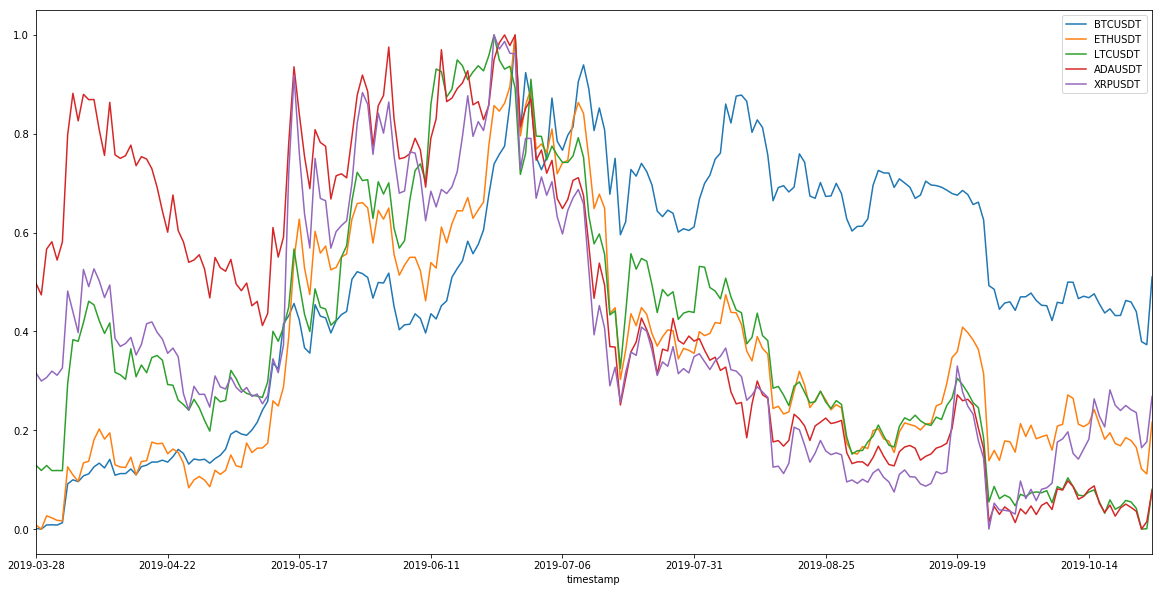

In [145]:
normalized_opd.plot(x='timestamp', y=tickers[0:5], figsize=(20,10))